# Lista 6

## Capítulo 9, exercício 4

Describe the main components necessary to add to a "standard" EA in order to tackle a multiobjective problem.

    É necessário que o EA seja capaz de efetuar as etapas do processo evolucionário. Etapas como a selação do pais, que dependem da fitness dos indivíduos devem ser modificadas para levar em consideração todos os objetivos. O mesmo vale para a etapa de seleção de sobreviventes, que ão pode ser beaseada em regras que dependem de um único valor para a fitness. Maneiras de fazer isso incluem a escalarização, que é a combinação de todos os objetivos em uma única função objetivo, atribuíndo pesos a cada função objetivo particular, ou usar um dos vários métodos propostos no capítulo, como por exemplo o MOGA (Fonesa e Flaming) que atribui a cada indivíduo um valor artificial para a fitness igual à quantidade de indivíduos da população atual que são dominados por este.
    Além de tratar as etapas do algoritmo que lidam diretamente com o valor da fitness, é necessário levar em consideração que enquanto problemas com uma única função objetivo têm somente um único fenótipo ótimo, problemas multiobjetivo têm como fenótipos não-dominados uma "frente de Pareto" potencialmente ilimitada. Como é desejável gerar indivíduos cujos fenótipos cubram a "frente de Pareto", em problema de multiobjetivo é muito importante a manutenção da diversidade na população de um EA.

## Capítulo 10, exercício 2 (só a primeira fase do enunciado).

Implement a simples memetic algorithm using a single iteration of a bit-flipping local search within the code for the SGA you developed for One-Max in Chapter 3.

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    'paper',
    'white',
    'colorblind',
    font_scale=2.2,
    rc={
        'lines.linewidth': 2,
        'text.usetex': True,
        'figure.figsize': (8.0, 6.0),
        'image.interpolation': 'nearest',
        'image.cmap': 'gray'
    },
)

In [16]:
def init_indv_rand(num_bits):
    return [int(bool(b)) for b in np.random.randint(2, size=num_bits)]

def eval_pop_rand(num_indv, num_bits):
    return np.array(list(map(lambda i: init_indv_rand(num_bits),range(num_indv))))

def eval_fenotipo(cromossomo):
    return sum(cromossomo)

def eval_fitness(populacao):
    return list(map(lambda i: (eval_fenotipo(list(populacao[i,:]))),range(len(populacao))))

def parent_selection(populacao, fitness, num_parents):
    fitness = np.array(fitness)
    pre_a = (fitness/sum(fitness))
    a = np.cumsum(pre_a)
    mating_pool = []
    current_member = 1
    ue = 1
    r = np.random.uniform(0,1/num_parents)
    while (current_member <= num_parents):
        while (r <= a[ue]):
            mating_pool.append(populacao[ue].tolist())
            r = r + 1/num_parents
            current_member = current_member + 1
        ue = ue + 1
    return np.array(mating_pool)

def binary_mutation(chromosome, mutation_rate):
    for alelo in chromosome:
        if np.random.uniform(0,1) < mutation_rate:
            alelo = int(not(alelo))
    return np.array(chromosome)

def eval_bin_mutation(mating_pool, mutation_rate):
    return np.array(list(map(lambda i: binary_mutation(mating_pool[i],mutation_rate),range(len(mating_pool)))))

def bit_flipping_local_search(offspring, mutation_rate):
    galera_boa = []
    galera_boa_fitness = []
    for child in offspring:
        child_fitness = eval_fenotipo(child)
        
        child_mut = binary_mutation(child, mutation_rate)
        child_mut_fitness = eval_fenotipo(child_mut)
        
        if (eval_fenotipo(child) > eval_fenotipo(child_mut)):
            galera_boa.append(child)
            galera_boa_fitness.append(child_fitness)
        else:
            galera_boa.append(child_mut)
            galera_boa_fitness.append(child_mut_fitness)
            
    return galera_boa, galera_boa_fitness

def one_pt_crossover(parents, crossover_rate):
    i, j = np.random.choice(range(len(parents)),2)
    if np.random.uniform(0,1) < crossover_rate:
        xchg_pt = np.random.choice(range(len(parents[0])))
        child_a = np.hstack((parents[i][:xchg_pt],parents[j][xchg_pt:]))
        child_b = np.hstack((parents[j][:xchg_pt],parents[i][xchg_pt:]))
    else:
        child_a = parents[i]
        child_b = parents[j]
    return np.array((child_a, child_b))

def eval_onept_crossover(parents, crossover_rate, num_crossover):
    return np.concatenate(list(map(lambda i: one_pt_crossover(parents, crossover_rate),range(num_crossover))))   

O máximo 25 foi encontrado na 33-ésima geração.


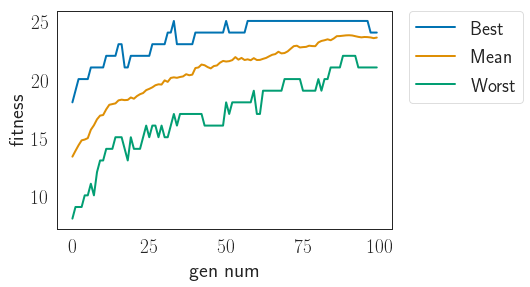

In [22]:
num_bits = 25
num_indv = 100
num_parents = 100
mutation_rate = 1/num_bits
crossover_rate = 0.7
num_crossover = int(num_indv/2)
num_geracoes = 100

populacao = eval_pop_rand(num_indv, num_bits)
pop_fitness = eval_fitness(populacao)

best_x = max(pop_fitness)
best = []
worst = []
mean = []
geracao = 0

for n in range(num_geracoes):
    # select parents
    mating_pool = parent_selection(populacao, pop_fitness, num_parents)
    # recombine to produce offsprings
    parents_xover = eval_onept_crossover(mating_pool, crossover_rate, num_crossover)
    # mutate offsprings
    offspring = eval_bin_mutation(parents_xover, mutation_rate)
    
    # improve offsprings via local search (USANDO LAMARCK AQUI)
    offspring, offspring_fitness  = bit_flipping_local_search(offspring, mutation_rate)
    
    populacao = offspring
    pop_fitness = offspring_fitness
    best.append(max(offspring_fitness))
    worst.append(min(offspring_fitness))
    mean.append(np.mean(offspring_fitness))
    
print(f'O máximo {max(best)} foi encontrado na {best.index(max(best))}-ésima geração.')   

sns.lineplot(range(len(best)), best, label="Best")
sns.lineplot(range(len(mean)), mean, label="Mean")
sns.lineplot(range(len(worst)), worst, label="Worst")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('gen num')
plt.ylabel('fitness')
plt.savefig('all.eps',format='eps')
plt.show()

## Capítulo 12, exercício 1

Specify the eight-queens problems as a CSP $(S, \phi)$

O problema das oito rainhas consiste em encontrar uma lista de oito posições distintas no tabuleiro de xadrez (que podem ser representadas, por exemplo, cada uma por um par ordenado $(n, m) \in \{1, 2, 3, 4, 5, 6, 7, 8\}^{2}$, uma posição para cada rainha, que satisfaça a seguinte restrição: nenhuma rainha deve pôr nenhuma das outras em xeque.

Essa restrição pode ser considerada como um conjunto de $8$ restrições, uma para cada rainha, a $i$-ésima restrição seria: A $i$-ésima rainha não deve pôr nenhuma das outras em xeque. Ou, um conjunto de $28$ restrições, uma para cada par de rainhas, seriam restrições do tipo: A $i$-ésima e a $j$-ésima rainhas não devem estar mutuamente em xeque.

Temos então: $S =$ conjunto de todas as listas de $8$ posições distintas dentre as $64$ de um tabuleiro de xadrez, e dada uma lista $L = [ L_1, L_2, \dots, L_8] \in S$ de posições das rainhas, $\phi(L)$ será uma: $\phi(L) = $ (as rainhas em $L_1$ e $L_2$ não estão em xeque) $\bigwedge$ (as rainhas em $L_1$ e $L_3$ não estão em xeque) ...  até conferir todas as combinações.


## Questão 4

Escreva (utilizando um pseudo-código) um algoritmo genético simples para a solução do Exercício 4 da Lista de Exercícios #5, considerando que a população não é de dicionários $\mathbf{Y}$, mas sim de matrizes $p_{\mathbf{y}|\mathbf{x}}$ descrevendo as probabilidades com as quais um vetor de dados $\mathbf{x}$ é atribuído a um agrupamento $\mathbf{y}$.

No caso de soft-clustering, onde um vetor de dados pertence, com diferente probabilidades, a vários agrupamentos, os centroides podem ser calculados como:
\begin{equation}
\mathbf{y}_{k} = \frac{\sum_{n=1}^{N}p(\mathbf{y}_k | \mathbf{x}_n)\mathbf{x}_n}{\sum_{n=1}^{N}p(\mathbf{y}_k | \mathbf{x}_n)}
\end{equation}
e o erro quadrático médio é
\begin{equation}
D = \sum_{n=1}^{N}p(\mathbf{x}_n)\sum_{n=1}^{K}p(\mathbf{y}_k|\mathbf{x}_n)||\mathbf{y}_k - \mathbf{x}_n||^2.
\end{equation}
Para vetores de entradas equiprováveis, o erro quadrático médio pode ser escrito como:
\begin{equation}
D = \frac{1}{N} \sum_{n=1}^{N}\sum_{n=1}^{K} p(\mathbf{y}_k | \mathbf{x}_n)||\mathbf{y}_k - \mathbf{x}_n||^{2}
\end{equation}
Com isso podemos escolher um genótipo formado pelas probabilidades condicionais $p(y|x)$ e um fenótipo que apresenta centroides calculados a partir da equação de $\mathbf{y}_{k}$. A função da fitness pode ser, por xemplo escolhida como $F(\mathbf{Y})  -D$, já que $D \geq 0$. Onde $\mathbf{Y}$ é dicionário obtido pela tradução de $g$, genótipo do indivíduo. Quanto a recombinação e mutação, é possível usar crossover de um ponto e perturbação gaussiana. No entanto, como os genes representam probabilidades, devemos normalizar os valores após as operações. Desta forma garantimos que os operadores sempre gerarão indivíduos válidos. 

Então podemos escrever o pseudo-código:

Tamanho da população: $\mu$, População: $\mathbf{P}$, Filhos: $\mathbf{O}$, Probabilidade de recombinação: $p_r$, Desvio-padrão da mutação: $\sigma_m$, Número máximo de avaliações: $L$, Tradução do genótipo para fenótipo: $trad(.)$, Vetor de fitness: $\mathbf{f}$, Função Custo: $D$, Melhor aptidão: best-apt, Melhor candidato: best-cand. 

$\textbf{while}$ i < L $\textbf{do}$:

-- $f_i$ = $D(trad(p_i))$
    
-- $\textbf{if}$ $f_i$ > best-apt

-- -- best-cand = $p_i$ 

-- $\mathbf{M}$ = SUS($\mathbf{P}$)

-- $\mathbf{O}$ = crossover($\mathbf{M}$, $p_r$)

-- $\mathbf{O}$ = $\mathbf{O}$ + $\sigma_r N(0,1)$

-- $\mathbf{O}$ = norm($\mathbf{O}$

-- $\mathbf{P}$ = $\mathbf{O}$

$\mathbf{Y}^{*}$ = t(best-cand)
